In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlb
import matplotlib.pyplot as plt

In [2]:
stock_data = pd.read_csv("Stock Market Data.csv")

In [3]:
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19


In [4]:
stock_data["Date"]= pd.to_datetime(stock_data["Date"],dayfirst=True)

In [5]:
stock_data.set_index('Date', inplace=True)

In [6]:
specific_company_name = "GP"
specific_company = stock_data[stock_data["Name"]==specific_company_name]

In [7]:
specific_banks_list = ["ABBANK","BRACBANK","CITYBANK","ISLAMIBANK","RUPALIBANK"]
specific_banks = stock_data[stock_data["Name"].isin(specific_banks_list)]

# <center>  Part 1: Data Cleaning and Exploration:

<h3><b>1. Calculate basic summary statistics for each column (mean, median, standard deviation, etc.).

**basic summary statistics

In [8]:
stock_data.describe()

,Open,High,Low,Close,Volume
count,49158.000000,49158.000000,49158.000000,49158.000000,4.915800e+04
mean,157.869018,159.588214,155.906364,157.351462,5.619999e+05
std,520.191624,523.348078,517.136149,519.711667,1.276909e+06
min,3.900000,3.900000,3.000000,3.800000,1.000000e+00
25%,19.000000,19.300000,18.700000,19.000000,5.109475e+04
50%,40.300000,41.000000,39.535000,40.100000,1.824160e+05
75%,89.400000,90.500000,87.700000,88.700000,5.401398e+05
max,6000.000000,6050.000000,5975.000000,6000.500000,6.593180e+07


***extra

In [9]:
stock_data[["Open","High","Low","Close","Volume"]].mean()

Open         157.869018
High         159.588214
Low          155.906364
Close        157.351462
Volume    561999.931974
dtype: float64

In [10]:
stock_data[["Open","High","Low","Close","Volume"]].median()

Open          40.300
High          41.000
Low           39.535
Close         40.100
Volume    182416.000
dtype: float64

In [11]:
stock_data[["Open","High","Low","Close","Volume"]].std()

Open      5.201916e+02
High      5.233481e+02
Low       5.171361e+02
Close     5.197117e+02
Volume    1.276909e+06
dtype: float64

<h2><b>2. Explore the distribution of the 'Close' prices over time.

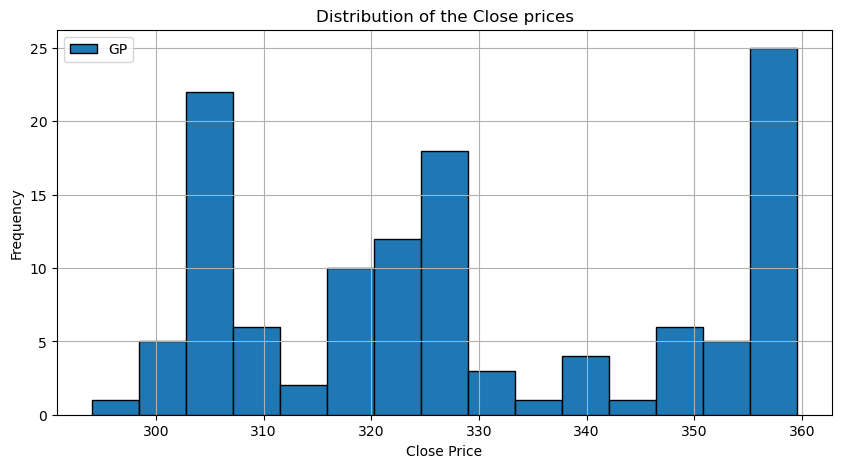

In [12]:
plt.figure(figsize=(10,5))

plt.hist(specific_company["Close"], bins=15, edgecolor='black', label=f"{specific_company_name}")

plt.title("Distribution of the Close prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

<h2><b>3. Identify and analyze any outliers (if any) in the dataset.

**calculation

In [13]:
sd_price_columns = stock_data[["Open","High","Low","Close","Volume"]]

sd_std = sd_price_columns.std()
sd_avg = sd_price_columns.mean()

higher_limit = sd_avg + 3*sd_std #3 standard deviations method
lower_limit = sd_avg - 3*sd_std  ##Although not required for this dataset*

**outliers in each column using 3 standard deviations method

In [14]:
outliers_column = ( (sd_price_columns > higher_limit) | (sd_price_columns < lower_limit)  ) 
outliers_column.sum()              

Open      943
High      947
Low       941
Close     941
Volume    906
dtype: int64

**total outliers in the dataset

In [15]:
total_outliers = stock_data[(sd_price_columns > higher_limit).any(axis=1)] 
total_outliers

,Name,Open,High,Low,Close,Volume
Date,,,,,,
2022-01-17,15.Services_&_Real_Estate,60.18,61.83,59.28,61.15,6056375.75
2022-01-18,15.Services_&_Real_Estate,63.03,66.15,59.05,64.75,5141492.75
2022-01-12,17.Telecommunication,209.87,213.37,204.67,207.20,4952772.33
2022-01-02,20.Bond,3634.00,3634.00,3609.00,3617.83,12.00
2022-01-03,20.Bond,4033.88,4040.13,4033.75,4034.50,4.75
...,...,...,...,...,...,...
2022-06-01,UNIONBANK,10.80,11.00,10.80,10.90,7746766.00
2022-06-06,UNIONBANK,10.80,11.20,10.70,11.00,6885189.00
2022-06-30,UNIONBANK,10.30,10.30,10.10,10.30,6726621.00


In [16]:
#total outliers in the dataset
total_outliers.shape

(1855, 6)

***extra

<Axes: ylabel='Frequency'>

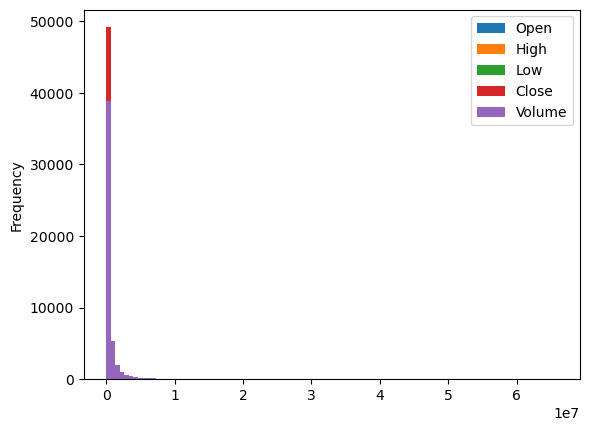

In [17]:
stock_data.plot(kind="hist",bins=100)

# <center> Part 2: Time Series Analysis / Rolling Window / Moving Averages :

<h3><b> 1. Create a line chart to visualize the 'Close' prices over time.

**specific banks

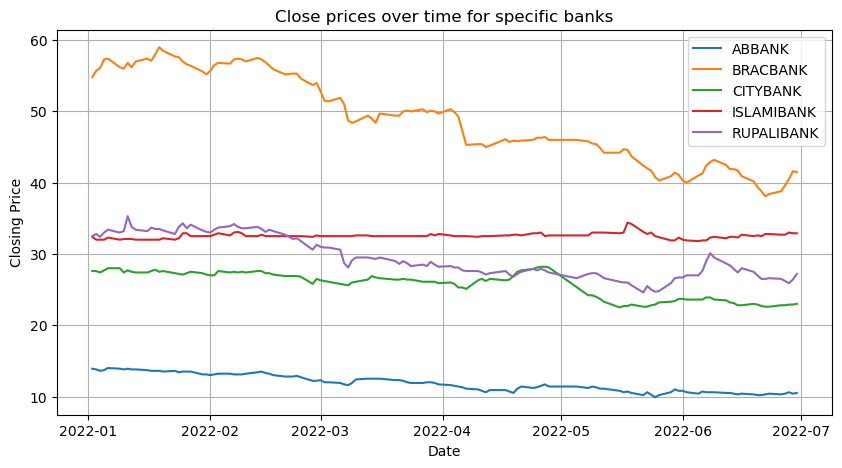

In [18]:
plt.figure(figsize=(10,5))

for x in specific_banks_list:
    x_data = specific_banks[specific_banks["Name"]==x]
    plt.plot(x_data["Close"] , label=x )

plt.title("Close prices over time for specific banks")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid()
plt.show()

**specific single company

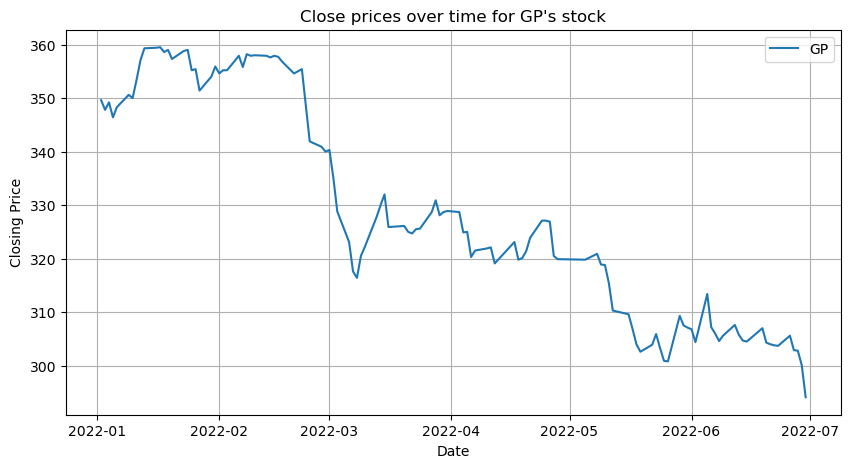

In [19]:
plt.figure(figsize=(10,5))

plt.plot(specific_company["Close"] , label=f"{specific_company_name}" )

plt.title(f"Close prices over time for {specific_company_name}'s stock")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid()
plt.show()

<h3><b> 2. Calculate and plot the daily percentage change in closing prices.

**calculation

In [20]:
daily_pct_change = specific_company["Close"].pct_change() #specific_company [GP]
daily_pct_change

Date
2022-01-02         NaN
2022-01-03   -0.005149
2022-01-04    0.004025
2022-01-05   -0.008018
2022-01-06    0.005485
                ...   
2022-06-26    0.006256
2022-06-27   -0.008835
2022-06-28   -0.000330
2022-06-29   -0.008917
2022-06-30   -0.019993
Name: Close, Length: 121, dtype: float64

**plot

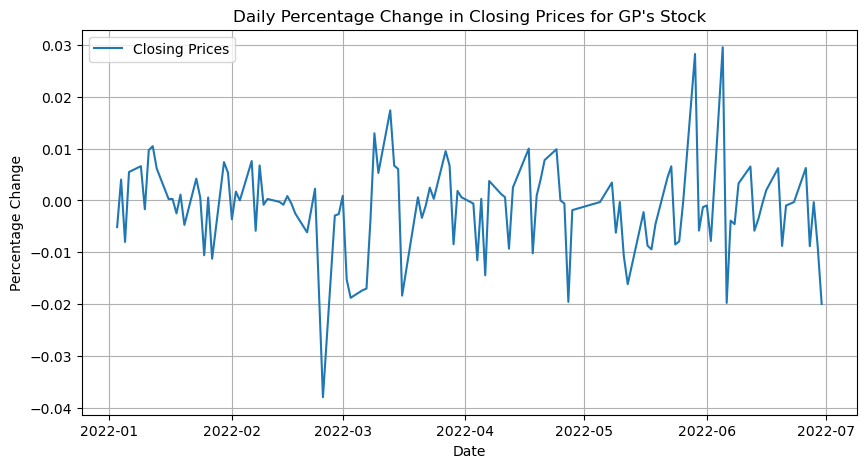

In [21]:
plt.figure(figsize=(10, 5))

plt.plot(daily_pct_change, label="Closing Prices")

plt.title(f"Daily Percentage Change in Closing Prices for {specific_company_name}'s Stock")
plt.xlabel("Date")
plt.ylabel("Percentage Change")
plt.legend()
plt.grid()
plt.show()

<h3><b> 3. Investigate the presence of any trends or seasonality in the stock prices.

**trends > using rolling window average

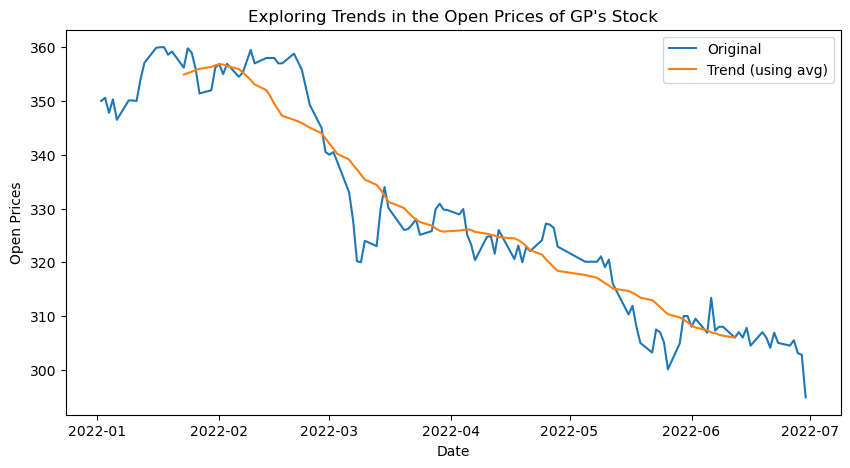

In [22]:
plt.figure(figsize=(10,5))

plt.plot( specific_company["Open"], label="Original")
plt.plot( specific_company["Open"].rolling(window=30,center=True).mean(), label="Trend (using avg)")

plt.title(f"Exploring Trends in the Open Prices of {specific_company_name}'s Stock")
plt.xlabel("Date")
plt.ylabel("Open Prices")
plt.legend()
plt.show()

**seasonal_decompose

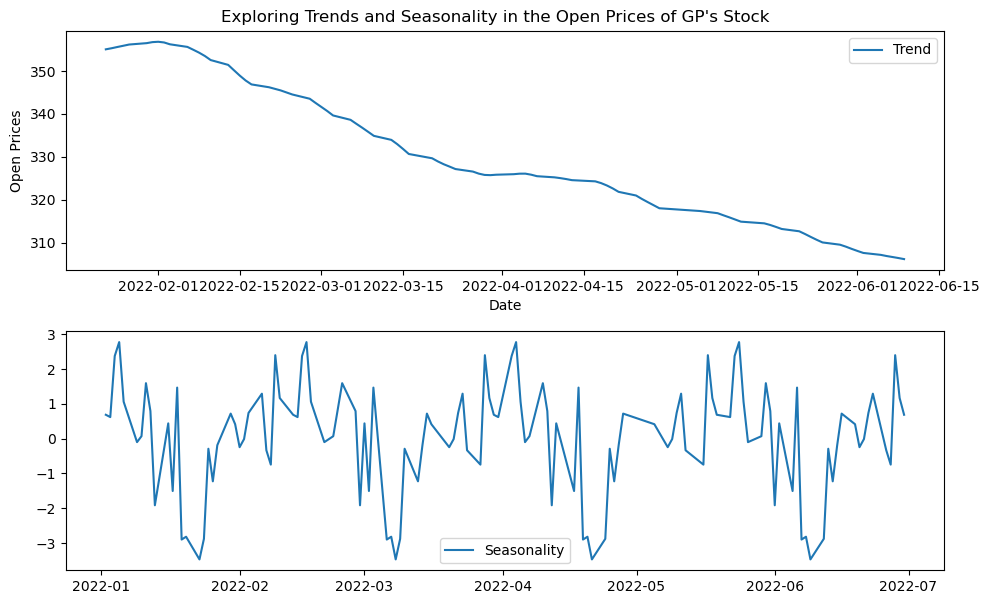

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(specific_company["Open"], period=30)


plt.figure(figsize=(10, 12))

plt.subplot(4,1,1)

#plt.plot(specific_company["Close"], label="Original")

plt.plot(result.trend, label="Trend")
plt.xlabel("Date")
plt.ylabel("Open Prices")
plt.legend()

plt.subplot(4,1,2)
plt.plot(result.seasonal, label="Seasonality")
plt.legend()


plt.suptitle(f"Exploring Trends and Seasonality in the Open Prices of {specific_company_name}'s Stock")
plt.tight_layout()
plt.show()

<h3><b> 4. Apply moving averages to smooth the time series data in 15/30 day intervals against the original graph.

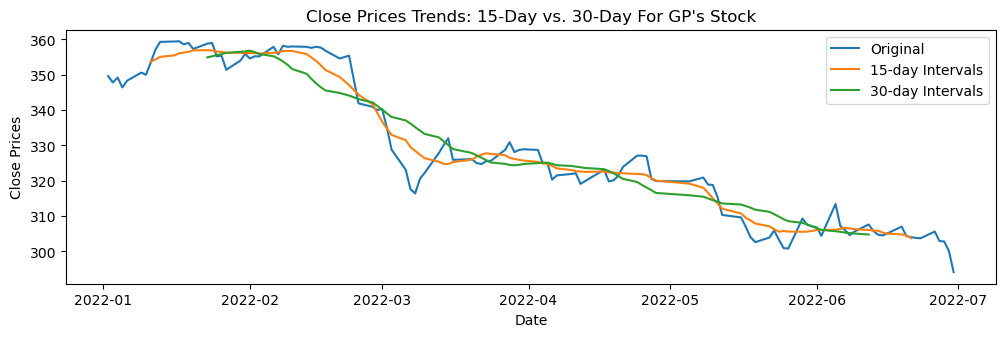

In [24]:
plt.figure(figsize=(12,3.3))

plt.plot( specific_company["Close"], label="Original")
plt.plot( specific_company["Close"].rolling(window=15,center=True).mean(), label="15-day Intervals")
plt.plot( specific_company["Close"].rolling(window=30,center=True).mean(), label="30-day Intervals")

plt.title(f"Close Prices Trends: 15-Day vs. 30-Day For {specific_company_name}'s Stock")
plt.xlabel("Date")
plt.ylabel("Close Prices")
plt.legend()
plt.show()

<h3><b> 5. Calculate the average closing price for each stock.

**Calculation

In [25]:
average_closing_price = stock_data.groupby("Name")["Close"].mean()
average_closing_price

Name
01.Bank                       21.260902
02.Cement                     96.600820
03.Ceramics_Sector            71.225164
04.Engineering               132.352459
05.Financial_Institutions     29.253525
                                ...    
WMSHIPYARD                    12.370492
YPL                           21.339344
ZAHEENSPIN                     9.964754
ZAHINTEX                       7.858197
ZEALBANGLA                   150.338525
Name: Close, Length: 412, dtype: float64

**new dataframe

In [26]:
average_closing_price_df = average_closing_price.reset_index(name="Average_Close")
average_closing_price_df

,Name,Average_Close
0,01.Bank,21.260902
1,02.Cement,96.600820
2,03.Ceramics_Sector,71.225164
3,04.Engineering,132.352459
4,05.Financial_Institutions,29.253525
...,...,...
407,WMSHIPYARD,12.370492
408,YPL,21.339344
409,ZAHEENSPIN,9.964754
410,ZAHINTEX,7.858197


<h3><b> 6. Identify the top 5 and bottom 5 stocks based on average closing price.

** Top 5 stocks based on average closing price

In [27]:
top_5 = average_closing_price_df.sort_values(by="Average_Close", ascending=False).head(5)
top_5

,Name,Average_Close
56,APSCLBOND,5413.238636
320,RECKITTBEN,5342.024793
298,PREBPBOND,4918.357143
178,IBBL2PBOND,4851.330357
283,PBLPBOND,4836.195652


** Bottom 5 stocks based on average closing price

In [28]:
bottom_5 = average_closing_price_df.sort_values(by="Average_Close", ascending=True).head(5)
bottom_5

,Name,Average_Close
144,FAMILYTEX,4.698361
187,ICBIBANK,4.725620
149,FBFIF,5.289344
293,POPULAR1MF,5.368033
291,PHPMF1,5.417213


# <center><h2> <b>Part 3: Volatility Analysis:

<h3><b> 1. Calculate and plot the rolling standard deviation of the 'Close' prices.

**calculation

In [29]:
sd_volatility = specific_company["Close"].rolling(window=15).std()  #15 days Intervals
sd_volatility

Date
2022-01-02         NaN
2022-01-03         NaN
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
                ...   
2022-06-26    1.246137
2022-06-27    1.272156
2022-06-28    1.360147
2022-06-29    1.824437
2022-06-30    3.215291
Name: Close, Length: 121, dtype: float64

**plot

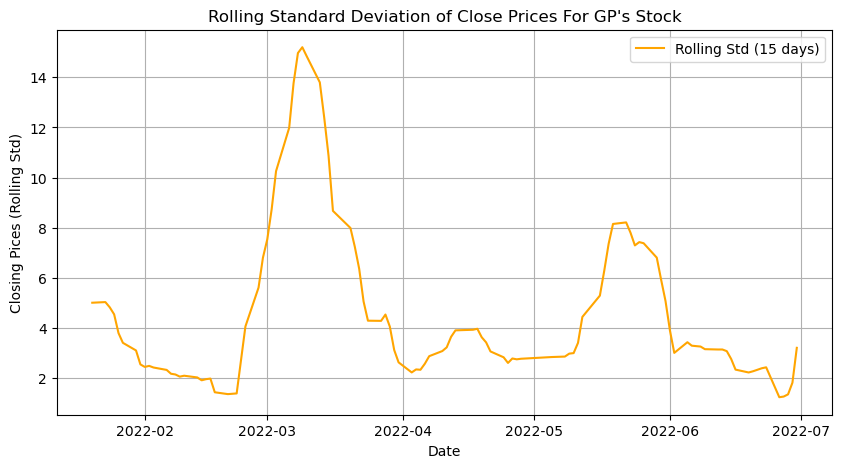

In [30]:
plt.figure(figsize=(10, 5))

plt.plot(sd_volatility, label="Rolling Std (15 days)", color="orange")

plt.title(f"Rolling Standard Deviation of Close Prices For {specific_company_name}'s Stock")
plt.xlabel("Date")
plt.ylabel("Closing Pices (Rolling Std)")
plt.legend()
plt.grid()
plt.show()

***extra

<Axes: xlabel='Date'>

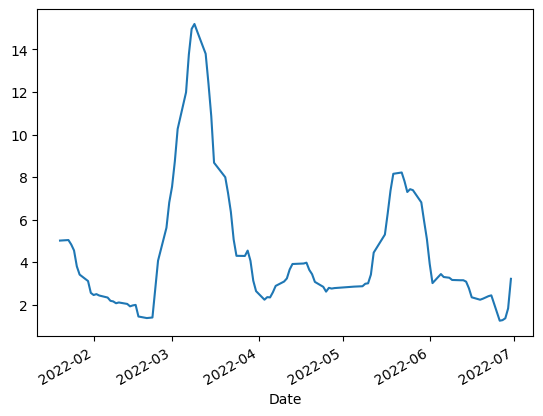

In [31]:
specific_company["Close"].rolling(window=15).std().plot() #GP

<h3><b> 2. Create a new column for daily price change (Close - Open).

In [32]:
stock_data["Daily Price Change"] = stock_data["Close"] - stock_data["Open"]
stock_data

,Name,Open,High,Low,Close,Volume,Daily Price Change
Date,,,,,,,
2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41,0.10
2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63,-0.13
2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97,-0.01
2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81,0.07
2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19,0.25
...,...,...,...,...,...,...,...
2022-06-26,ZEALBANGLA,169.00,174.90,169.00,170.30,10480.00,1.30
2022-06-27,ZEALBANGLA,174.10,176.00,166.90,167.50,13817.00,-6.60
2022-06-28,ZEALBANGLA,170.00,170.90,167.00,168.10,5214.00,-1.90


<i>*** for update ***

In [33]:
specific_company_name = "GP"
specific_company = stock_data[stock_data["Name"]==specific_company_name]
specific_banks_list = ["ABBANK","BRACBANK","CITYBANK","ISLAMIBANK","RUPALIBANK"]
specific_banks = stock_data[stock_data["Name"].isin(specific_banks_list)]

<h3><b> 3. Analyze the distribution of daily price changes.

** for a specific company's stock

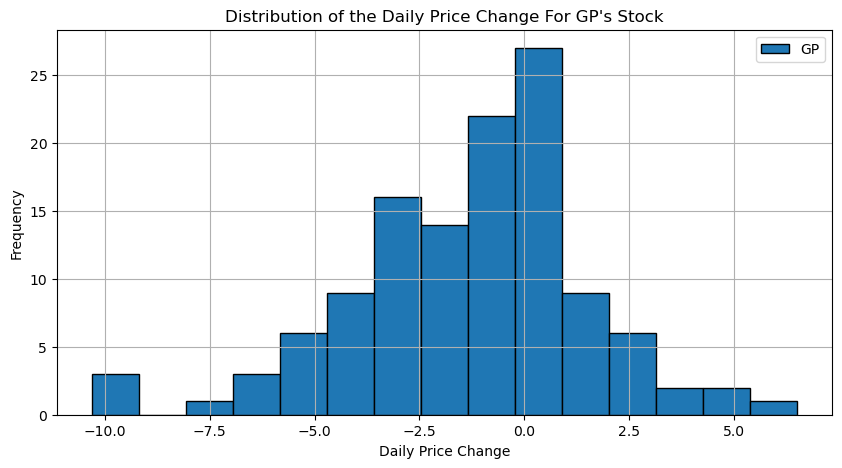

In [34]:
plt.figure(figsize=(10,5))

plt.hist(specific_company["Daily Price Change"], bins=15, edgecolor="black", label=f"{specific_company_name}")

plt.title(f"Distribution of the Daily Price Change For {specific_company_name}'s Stock")
plt.xlabel("Daily Price Change")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

**for all the company's stock

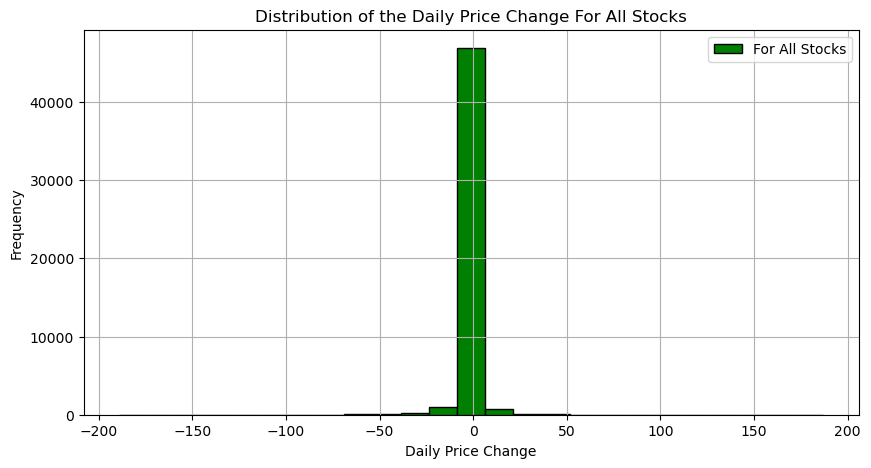

In [35]:
plt.figure(figsize=(10,5))

plt.hist(stock_data["Daily Price Change"], bins=25,color="green", edgecolor="black", label="For All Stocks")

plt.title("Distribution of the Daily Price Change For All Stocks")
plt.xlabel("Daily Price Change")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

<h3><b> 4. Identify days with the largest price increases and decreases.

**largest price increases

In [36]:
largest_increase_day = stock_data[stock_data["Daily Price Change"] == stock_data["Daily Price Change"].max()]
largest_increase_day.sort_values(by="Daily Price Change", ascending=False)

,Name,Open,High,Low,Close,Volume,Daily Price Change
Date,,,,,,,
2022-06-29,SJIBLPBOND,4710.0,4899.0,4710.0,4897.0,101.0,187.0


**largest price increases each day

In [37]:
increase = stock_data.groupby("Date")["Daily Price Change"].max()
increase.sort_values(ascending=False)

Date
2022-06-29    187.0
2022-06-27    145.5
2022-06-21    141.5
2022-01-05    125.6
2022-06-30    124.5
              ...  
2022-04-12      7.0
2022-06-14      6.1
2022-04-03      5.7
2022-03-10      4.5
2022-02-24      3.2
Name: Daily Price Change, Length: 122, dtype: float64

**largest price decreases

In [38]:
largest_decrease_day = stock_data[stock_data["Daily Price Change"] == stock_data["Daily Price Change"].min()]
largest_decrease_day.sort_values(by="Daily Price Change", ascending=True)

,Name,Open,High,Low,Close,Volume,Daily Price Change
Date,,,,,,,
2022-03-07,RECKITTBEN,5753.0,5753.0,5550.0,5563.8,1876.0,-189.2


**largest price decreases each day

In [39]:
decrease = stock_data.groupby("Date")["Daily Price Change"].min()
decrease.sort_values(ascending=True)

Date
2022-03-07   -189.2
2022-01-03   -182.5
2022-04-28   -178.7
2022-01-20   -166.6
2022-01-31   -154.9
              ...  
2022-03-03    -16.2
2022-05-05    -16.0
2022-05-09    -14.3
2022-06-12    -10.1
2022-04-19     -9.8
Name: Daily Price Change, Length: 122, dtype: float64

<h3><b> 5. Identify stocks with unusually high trading volume on certain days.

**using the 3 standard deviations method

In [40]:
volume_limit = sd_avg["Volume"] + 3 * sd_std["Volume"]  #3 standard deviations method

unusually_high_volume = (stock_data[stock_data["Volume"] > volume_limit])

unusually_high_volume.sort_values(by="Volume",ascending=False)

,Name,Open,High,Low,Close,Volume,Daily Price Change
Date,,,,,,,
2022-01-31,UNIONBANK,14.6,14.6,13.0,13.2,65931798.0,-1.4
2022-05-22,SOUTHEASTB,14.1,14.9,14.0,14.8,47588963.0,0.7
2022-02-03,UNIONBANK,12.8,14.0,12.6,14.0,30513155.0,1.2
2022-01-06,ONEBANKLTD,14.1,14.8,14.0,14.4,26013201.0,0.3
2022-01-17,SAIFPOWER,43.4,46.8,43.0,46.3,22441452.0,2.9
...,...,...,...,...,...,...,...
2022-05-29,RINGSHINE,9.0,9.7,9.0,9.5,4406585.0,0.5
2022-06-29,BDFINANCE,49.9,50.2,48.9,49.1,4406287.0,-0.8
2022-02-14,APOLOISPAT,10.1,10.2,9.6,9.9,4404704.0,-0.2


# <center><h2> <b>Part 4: Correlation and Heatmaps:

<h3><b> 1. Explore the relationship between trading volume and volatility.

** volatility using daily percentage change

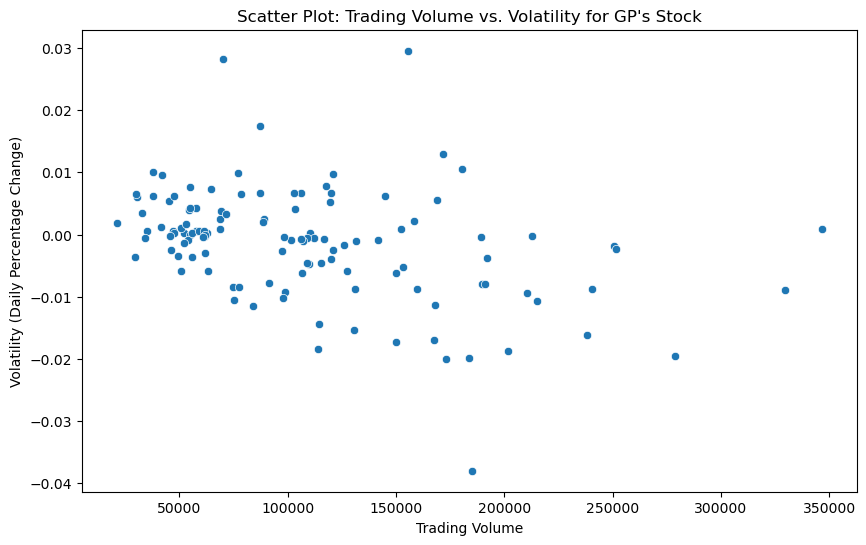

In [41]:
volatility_1 = daily_pct_change  ### From>> Part:2 Question:2 (Daily Percentage Change)

plt.figure(figsize=(10, 6))

sns.scatterplot(x=specific_company["Volume"], y=volatility_1)

plt.title(f"Scatter Plot: Trading Volume vs. Volatility for {specific_company_name}'s Stock")
plt.xlabel("Trading Volume")
plt.ylabel("Volatility (Daily Percentage Change)")
plt.show()

**using rolling standard deviation 15 days intervals

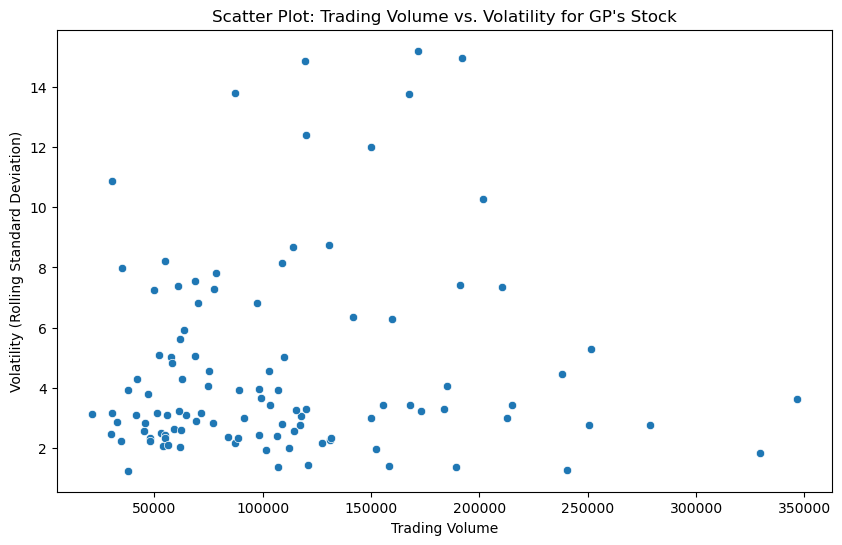

In [42]:
volatility_2 = sd_volatility ### From>> Part:3 Question:1 [Rolling Standard Deviation 15 days Intervals]

plt.figure(figsize=(10, 6))

sns.scatterplot(x=specific_company["Volume"], y=volatility_2) 


plt.title(f"Scatter Plot: Trading Volume vs. Volatility for {specific_company_name}'s Stock")
plt.xlabel("Trading Volume")
plt.ylabel("Volatility (Rolling Standard Deviation)")
plt.show()

<h3><b> 2. Calculate the correlation matrix between the 'Open' & 'High', 'Low' &'Close' prices.

In [43]:
correlation_matrix = stock_data[["Open", "High", "Low", "Close"]].corr()
correlation_matrix

,Open,High,Low,Close
Open,1.000000,0.999940,0.999939,0.999925
High,0.999940,1.000000,0.999887,0.999942
Low,0.999939,0.999887,1.000000,0.999961
Close,0.999925,0.999942,0.999961,1.000000


<h3><b> 3. Create a heatmap to visualize the correlations using the seaborn package.

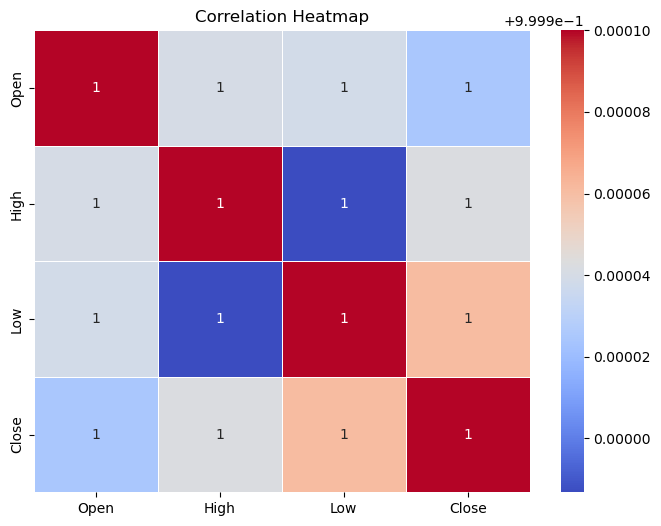

In [44]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.6)

plt.title("Correlation Heatmap")
plt.show()

# <center>Bonus Task:

****resolved rolling window warning

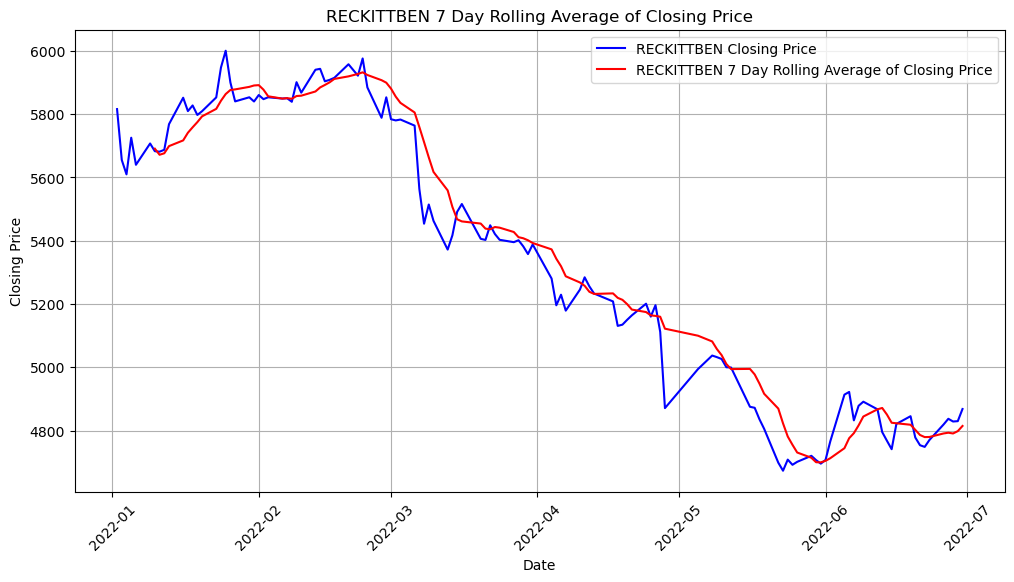

In [45]:
bonus_specific_company='RECKITTBEN'

specific_data=stock_data[stock_data['Name']==bonus_specific_company].copy() #>>>>>>>>>>  .copy()

specific_data['7_Day_Rolling_Avg']=specific_data['Close'].rolling(window=7).mean()

plt.figure(figsize=(12,6))

plt.plot(specific_data['Close'], label=f'{bonus_specific_company} Closing Price',color='blue')
plt.plot(specific_data['7_Day_Rolling_Avg'], label=f'{bonus_specific_company} 7 Day Rolling Average of Closing Price', color='red')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{bonus_specific_company} 7 Day Rolling Average of Closing Price')
plt.grid()
plt.legend()
plt.xticks(rotation=45) 
plt.show()

# <center> <b>ABU SAEYD